<a href="https://colab.research.google.com/github/humanet1603/krx_using_api/blob/main/%EB%A7%A4%EB%A7%A4%EC%9D%98_%EA%B8%B0%EC%88%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2018년도 주식시장 상황

In [1]:
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 20.7 MB/s eta 0:00:00


In [2]:
from pykrx import stock
import pandas as pd

# 2018년 1월 1일부터 2018년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df = stock.get_index_ohlcv_by_date("20180101", "20181231", "1001")  # "1001"은 KOSPI 지수 코드

# 데이터 확인
print(df.head())

# 데이터 저장 (필요시)
df.to_csv("/content/KOSPI_2018.csv")


코스피              시가       고가       저가       종가        거래량           거래대금  \
날짜                                                                         
2018-01-02  2474.86  2481.02  2465.94  2479.65  262205431  4786386686165   
2018-01-03  2484.63  2493.40  2481.91  2486.35  331094681  6019622040484   
2018-01-04  2502.50  2502.50  2466.45  2466.46  333836328  6896287056563   
2018-01-05  2476.85  2497.52  2475.51  2497.52  308769669  6317518427311   
2018-01-08  2510.70  2515.37  2494.18  2513.28  311429324  6404885697956   

코스피                   상장시가총액  
날짜                            
2018-01-02  1613508196692261  
2018-01-03  1617634317727445  
2018-01-04  1604916139690676  
2018-01-05  1624970533116195  
2018-01-08  1634777680824259  


In [5]:
!pip install matplotlib

코스피              시가       고가       저가       종가        거래량           거래대금  \
날짜                                                                         
2018-01-02  2474.86  2481.02  2465.94  2479.65  262205431  4786386686165   
2018-01-03  2484.63  2493.40  2481.91  2486.35  331094681  6019622040484   
2018-01-04  2502.50  2502.50  2466.45  2466.46  333836328  6896287056563   
2018-01-05  2476.85  2497.52  2475.51  2497.52  308769669  6317518427311   
2018-01-08  2510.70  2515.37  2494.18  2513.28  311429324  6404885697956   

코스피                   상장시가총액  
날짜                            
2018-01-02  1613508196692261  
2018-01-03  1617634317727445  
2018-01-04  1604916139690676  
2018-01-05  1624970533116195  
2018-01-08  1634777680824259  


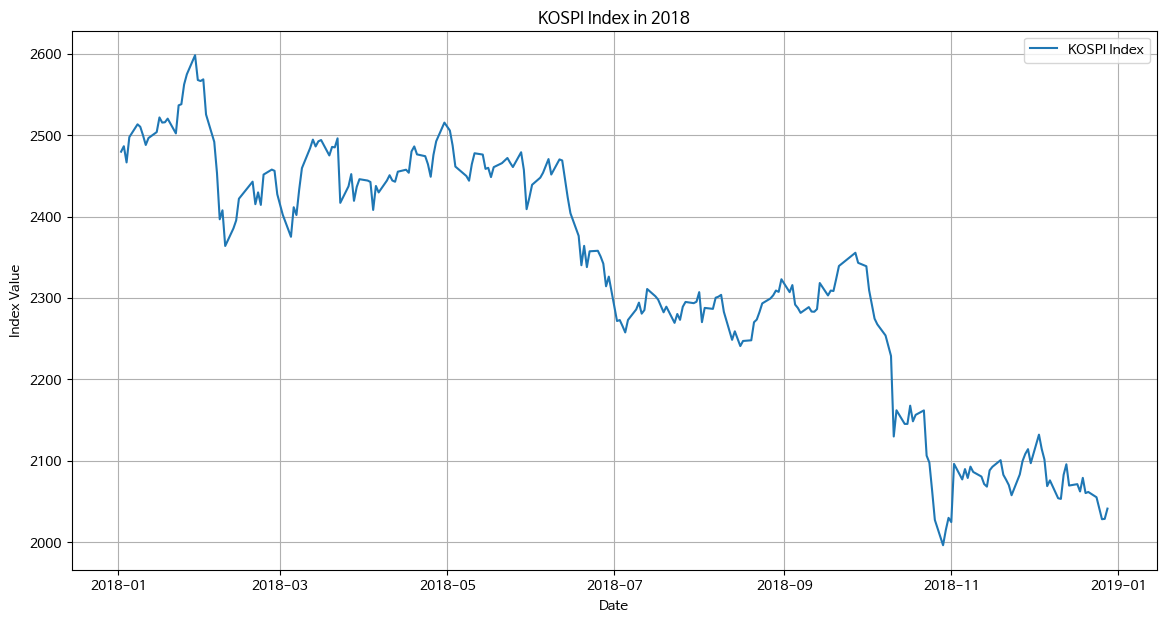

In [7]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2018년 1월 1일부터 2018년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df = stock.get_index_ohlcv_by_date("20180101", "20181231", "1001")  # "1001"은 KOSPI 지수 코드

# 데이터 확인
print(df.head())

# 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['종가'], label='KOSPI Index')
plt.title('KOSPI Index in 2018')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


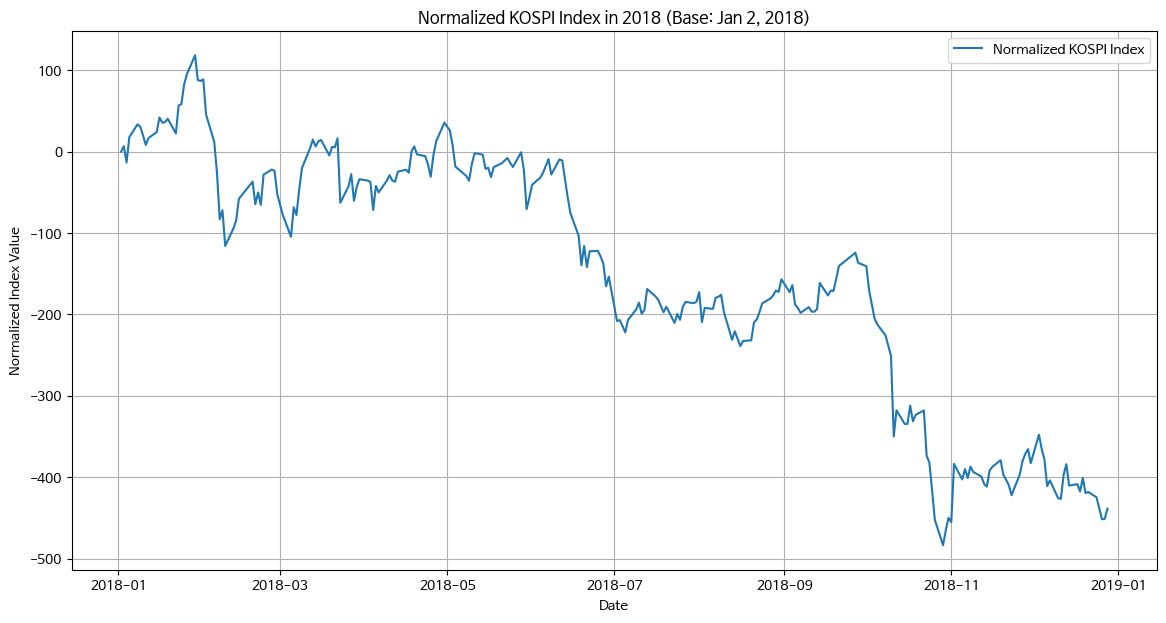

In [8]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2018년 1월 2일부터 2018년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df = stock.get_index_ohlcv_by_date("20180102", "20181231", "1001")  # "1001"은 KOSPI 지수 코드

# 2018년 1월 2일의 종가 가져오기
initial_close = df.iloc[0]['종가']

# 종가를 기준으로 정규화
df['정규화 종가'] = df['종가'] - initial_close

# 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['정규화 종가'], label='Normalized KOSPI Index')
plt.title('Normalized KOSPI Index in 2018 (Base: Jan 2, 2018)')
plt.xlabel('Date')
plt.ylabel('Normalized Index Value')
plt.legend()
plt.grid(True)
plt.show()


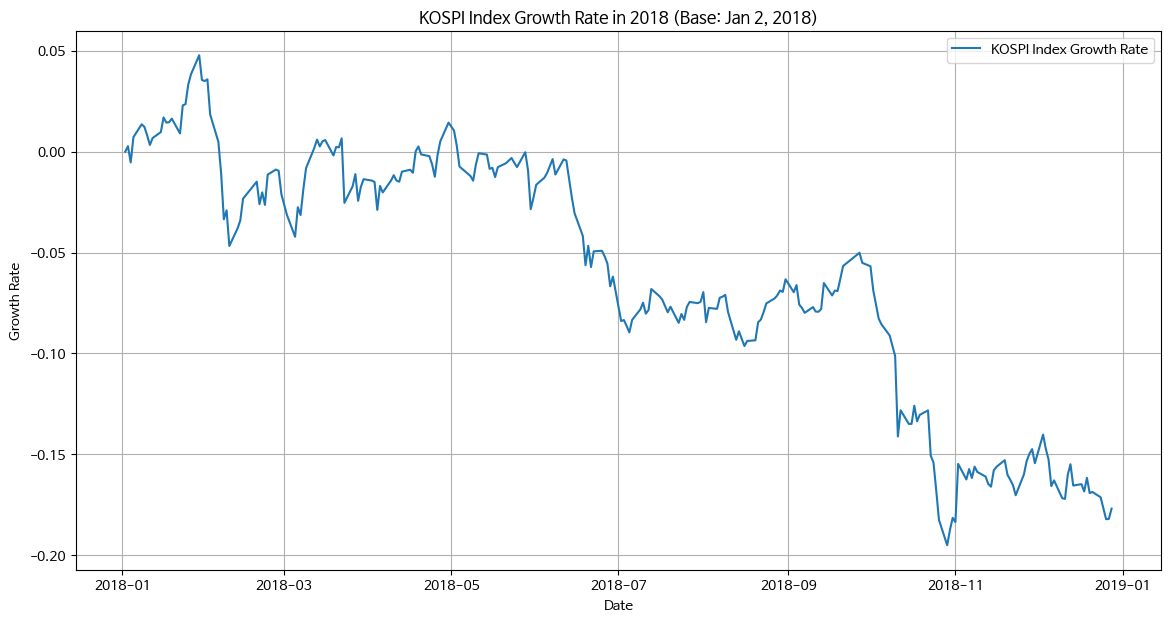

In [9]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2018년 1월 2일부터 2018년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df = stock.get_index_ohlcv_by_date("20180102", "20181231", "1001")  # "1001"은 KOSPI 지수 코드

# 2018년 1월 2일의 종가 가져오기
initial_close = df.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df['증가율'] = (df['종가'] / initial_close) - 1

# 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['증가율'], label='KOSPI Index Growth Rate')
plt.title('KOSPI Index Growth Rate in 2018 (Base: Jan 2, 2018)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


### 2018년도 투자자별 순매수 현황

In [3]:
from pykrx import stock

# 2018년 1월 1일부터 2018년 12월 31일까지의 KOSPI 투자자별 거래 데이터 가져오기
df_investor = stock.get_market_trading_value_by_date("20180101", "20181231", "KOSPI")

# 데이터 확인
print(df_investor.head())

# 데이터 저장 (필요시)
df_investor.to_csv("KOSPI_Investor_2018.csv")


                    기관합계         기타법인            개인         외국인합계  전체
날짜                                                                   
2018-01-02 -276231823161  39547173315  -26748556121  263433205967   0
2018-01-03 -398032953865  22955583784  -24158623194  399235993275   0
2018-01-04 -384461413994   4343337186   44246512095  335871564713   0
2018-01-05  102182433145  22585493711 -370491328497  245723401641   0
2018-01-08  -87326837178  47673588133 -351177151300  390830400345   0


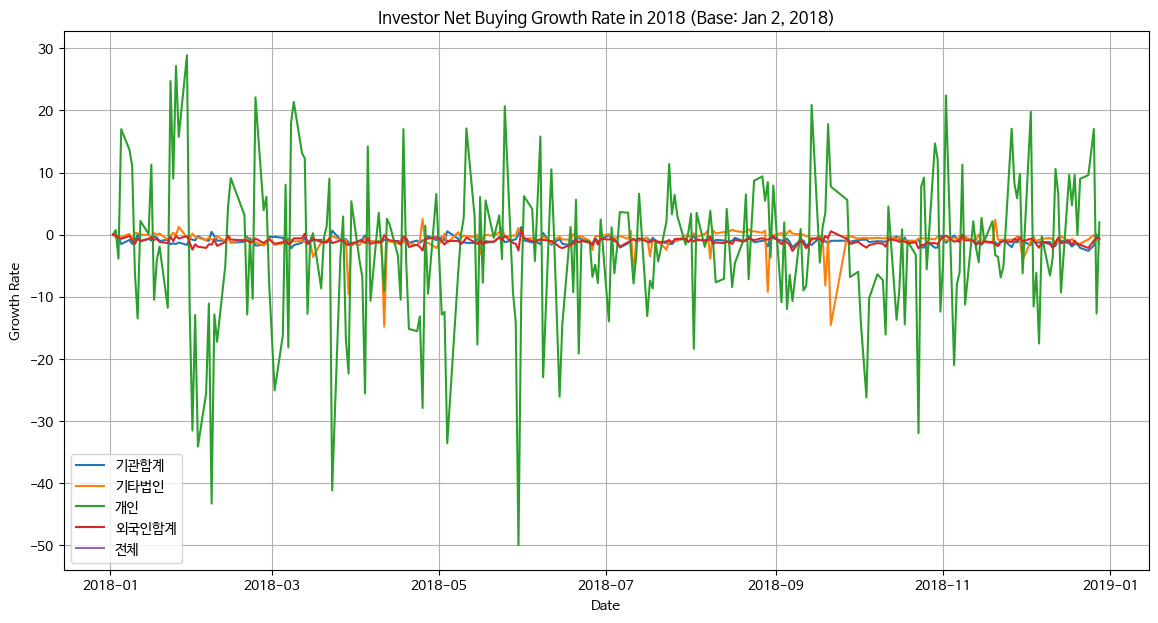

In [10]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2018년 1월 2일부터 2018년 12월 31일까지의 KOSPI 투자자별 거래 데이터 가져오기
df_investor = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매수")

# 2018년 1월 2일의 투자자별 순매수 금액 가져오기
initial_values = df_investor.iloc[0]

# 투자자별 순매수 금액 증가율 계산
growth_rates = df_investor / initial_values - 1

# 데이터 시각화
plt.figure(figsize=(14, 7))

for column in growth_rates.columns:
    plt.plot(growth_rates.index, growth_rates[column], label=column)

plt.title('Investor Net Buying Growth Rate in 2018 (Base: Jan 2, 2018)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


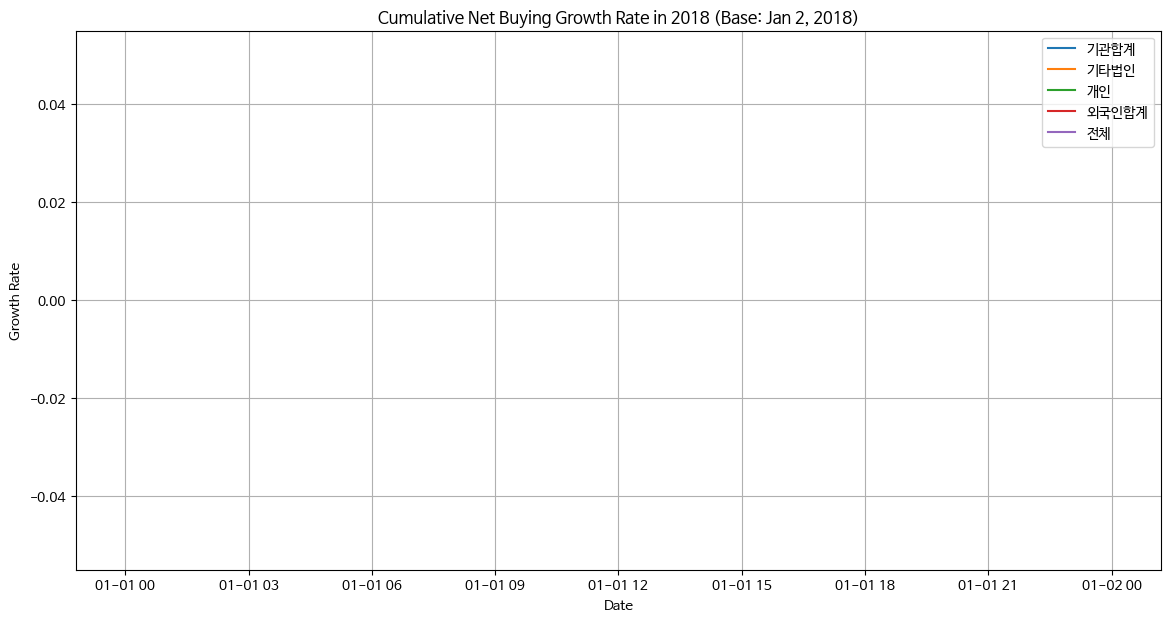

In [11]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2018년 1월 2일부터 2018년 12월 31일까지의 KOSPI 투자자별 거래 데이터 가져오기
df_investor_buy = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매수")
df_investor_sell = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매도")

# 누적 순매수량 계산
df_investor = df_investor_buy - df_investor_sell
cumulative_net_buy = df_investor.cumsum()

# 2018년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values = cumulative_net_buy.iloc[0]
growth_rates = cumulative_net_buy / initial_values - 1

# 데이터 시각화
plt.figure(figsize=(14, 7))

for column in growth_rates.columns:
    plt.plot(growth_rates.index, growth_rates[column], label=column)

plt.title('Cumulative Net Buying Growth Rate in 2018 (Base: Jan 2, 2018)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


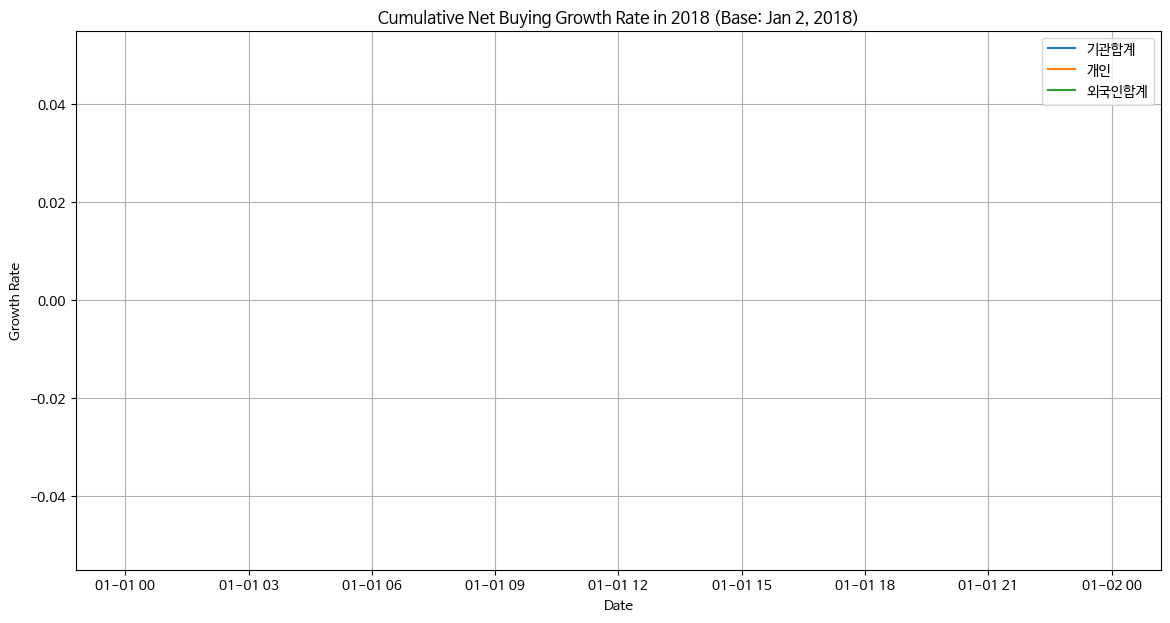

In [13]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2018년 1월 2일부터 2018년 12월 31일까지의 KOSPI 투자자별 매수 및 매도 데이터 가져오기
df_investor_buy = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매수")
df_investor_sell = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매도")

# 누적 순매수량 계산
df_investor = df_investor_buy - df_investor_sell
cumulative_net_buy = df_investor.cumsum()

# 기관, 개인, 외국인 데이터만 선택
cumulative_net_buy = cumulative_net_buy[['기관합계', '개인', '외국인합계']]

# 2018년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values = cumulative_net_buy.iloc[0]
growth_rates = cumulative_net_buy / initial_values - 1

# 데이터 시각화
plt.figure(figsize=(14, 7))

for column in growth_rates.columns:
    plt.plot(growth_rates.index, growth_rates[column], label=column)

plt.title('Cumulative Net Buying Growth Rate in 2018 (Base: Jan 2, 2018)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2018년 1월 2일부터 2018년 12월 31일까지의 KOSPI 투자자별 매수 및 매도 데이터 가져오기
df_buy = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매수")
df_sell = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매도")

# 투자자별 순매수량 계산
df_net_buy = df_buy - df_sell

# 기관, 개인, 외국인 데이터만 선택
df_net_buy = df_net_buy[['기관합계', '개인', '외국인']]

# 누적 순매수량 계산
cumulative_net_buy = df_net_buy.cumsum()

# 2018년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values = cumulative_net_buy.iloc[0]
growth_rates = cumulative_net_buy / initial_values - 1

# 데이터 시각화
plt.figure(figsize=(14, 7))

for column in growth_rates.columns:
    plt.plot(growth_rates.index, growth_rates[column], label=column)

plt.title('Cumulative Net Buying Growth Rate in 2018 (Base: Jan 2, 2018)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from pykrx import stock

# 2018년 1월 2일부터 2018년 12월 31일까지의 KOSPI 투자자별 매수 및 매도 데이터 가져오기
df_buy = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매수")
df_sell = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매도")

# 데이터 확인
print("Buy Data:")
print(df_buy.head())
print("\nSell Data:")
print(df_sell.head())


Buy Data:
                    기관합계         기타법인            개인         외국인합계  전체
날짜                                                                   
2018-01-02 -507392553861  40078702820  -24480625221  491794476262   0
2018-01-03 -424691985820  24548529399  -42697761484  442841217905   0
2018-01-04 -330099796959   5550257541   69760272365  254789267053   0
2018-01-05  255171072455  24411202986 -440395184512  160812909071   0
2018-01-08  -78027789043  45696553498 -359753078855  392084314400   0

Sell Data:
                    기관합계         기타법인            개인         외국인합계  전체
날짜                                                                   
2018-01-02 -507392553861  40078702820  -24480625221  491794476262   0
2018-01-03 -424691985820  24548529399  -42697761484  442841217905   0
2018-01-04 -330099796959   5550257541   69760272365  254789267053   0
2018-01-05  255171072455  24411202986 -440395184512  160812909071   0
2018-01-08  -78027789043  45696553498 -359753078855  392084314400   

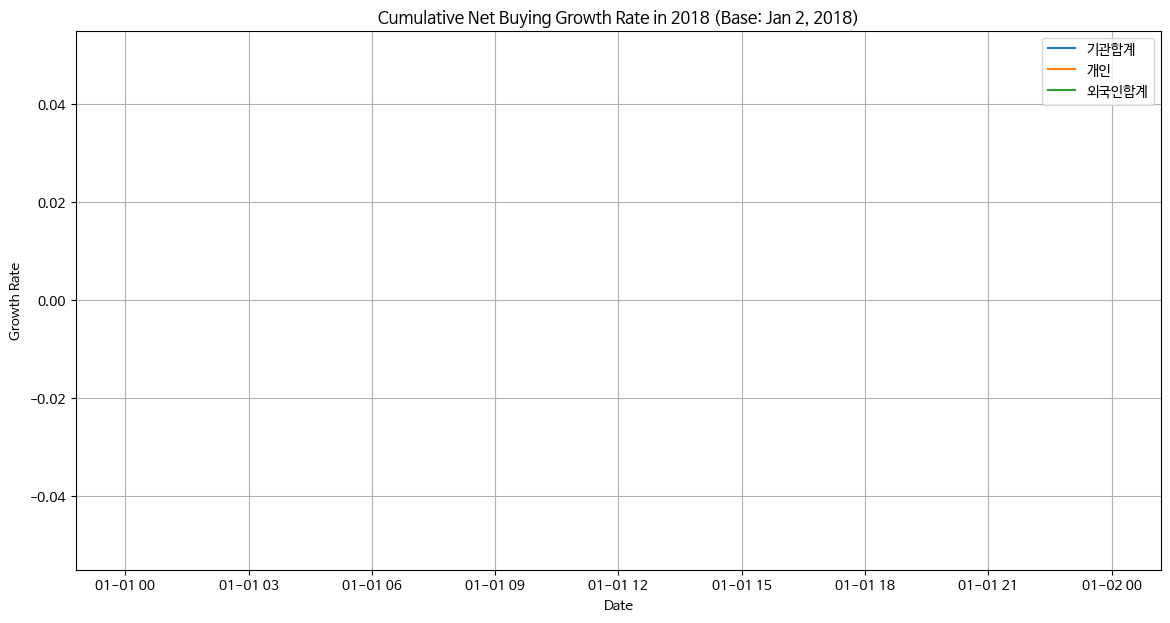

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 투자자별 순매수량 계산
df_net_buy = df_buy - df_sell

# 기관, 개인, 외국인 데이터만 선택
df_net_buy = df_net_buy[['기관합계', '개인', '외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy = df_net_buy.cumsum()

# 2018년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values = cumulative_net_buy.iloc[0]
growth_rates = cumulative_net_buy / initial_values - 1

# 데이터 시각화
plt.figure(figsize=(14, 7))

for column in growth_rates.columns:
    plt.plot(growth_rates.index, growth_rates[column], label=column)

plt.title('Cumulative Net Buying Growth Rate in 2018 (Base: Jan 2, 2018)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# 기관, 개인, 외국인 데이터만 선택
df_net_buy = df_net_buy[['기관합계', '개인', '외국인합계']]

# 데이터 확인
print("\nFiltered Net Buy Data:")
print(df_net_buy.head())



Filtered Net Buy Data:
            기관합계  개인  외국인합계
날짜                         
2018-01-02     0   0      0
2018-01-03     0   0      0
2018-01-04     0   0      0
2018-01-05     0   0      0
2018-01-08     0   0      0


In [18]:
from pykrx import stock
import pandas as pd

# 2018년 1월 2일부터 2018년 12월 31일까지의 KOSPI 투자자별 매수 및 매도 데이터 가져오기
df_buy = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매수")
df_sell = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI", "매도")

# 데이터 확인
print("Buy Data:")
print(df_buy.head(10))
print("\nSell Data:")
print(df_sell.head(10))


Buy Data:
                    기관합계         기타법인            개인         외국인합계  전체
날짜                                                                   
2018-01-02 -507392553861  40078702820  -24480625221  491794476262   0
2018-01-03 -424691985820  24548529399  -42697761484  442841217905   0
2018-01-04 -330099796959   5550257541   69760272365  254789267053   0
2018-01-05  255171072455  24411202986 -440395184512  160812909071   0
2018-01-08  -78027789043  45696553498 -359753078855  392084314400   0
2018-01-09  242620319164   2838500599 -295997952120   50539132357   0
2018-01-10   55256524056  51486718992  123812147067 -230555390115   0
2018-01-11 -542344867146  50389859151  305374162089  186580845906   0
2018-01-12   38149128502  40857035031  -78875257740    -130905793   0
2018-01-15 -170012720544  36917841701  -27365549920  160460428763   0

Sell Data:
                    기관합계         기타법인            개인         외국인합계  전체
날짜                                                                  

Trading Value Data:
                    기관합계         기타법인            개인         외국인합계  전체
날짜                                                                   
2018-01-02 -276231823161  39547173315  -26748556121  263433205967   0
2018-01-03 -398032953865  22955583784  -24158623194  399235993275   0
2018-01-04 -384461413994   4343337186   44246512095  335871564713   0
2018-01-05  102182433145  22585493711 -370491328497  245723401641   0
2018-01-08  -87326837178  47673588133 -351177151300  390830400345   0
2018-01-09  212155165869   4627635844 -260592118210   43809316497   0
2018-01-10   99336442531  49278781222  130250802952 -278866026705   0
2018-01-11 -544729047711  52216169101  316957701424  175555177186   0
2018-01-12  164349920557  40375420196  -87139619965 -117585720788   0
2018-01-15   14535727016  30871668521  -69810518735   24403123198   0


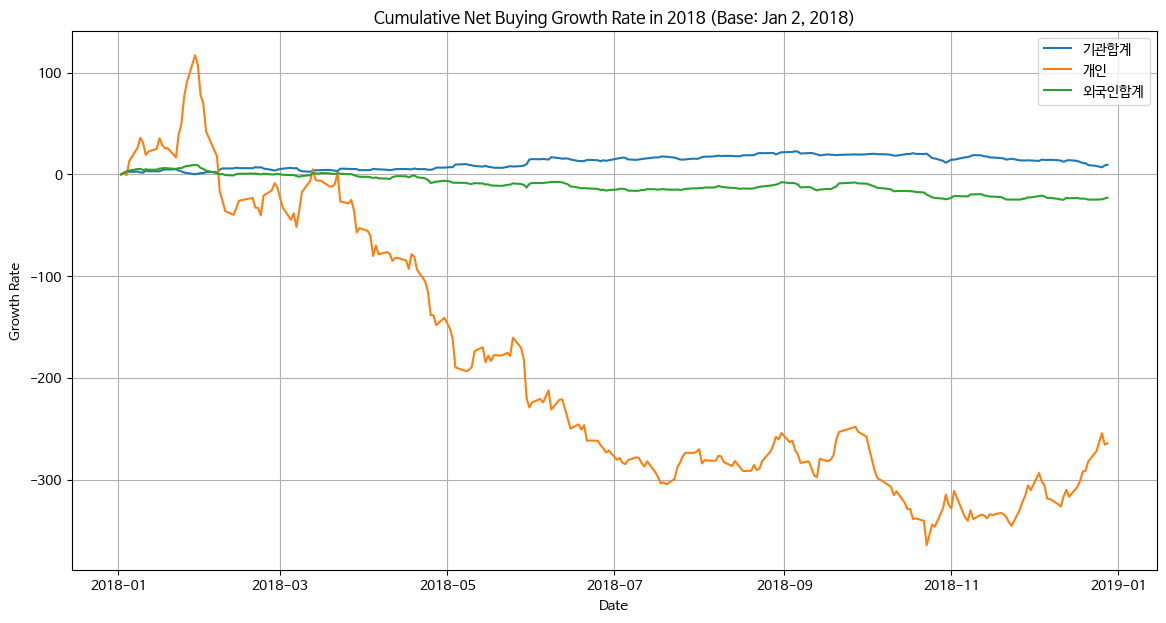

In [20]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2018년 1월 2일부터 2018년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df = stock.get_market_trading_value_by_date("20180102", "20181231", "KOSPI")

# 데이터 확인
print("Trading Value Data:")
print(df.head(10))

# 기관, 개인, 외국인 데이터만 선택
df = df[['기관합계', '개인', '외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy = df.cumsum()

# 2018년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values = cumulative_net_buy.iloc[0]
growth_rates = cumulative_net_buy / initial_values - 1

# 데이터 시각화
plt.figure(figsize=(14, 7))

for column in growth_rates.columns:
    plt.plot(growth_rates.index, growth_rates[column], label=column)

plt.title('Cumulative Net Buying Growth Rate in 2018 (Base: Jan 2, 2018)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


KOSPI Index Data:
코스피              시가       고가       저가       종가        거래량           거래대금  \
날짜                                                                         
2020-01-02  2201.21  2202.32  2171.84  2175.17  494677752  4638167309579   
2020-01-03  2192.58  2203.38  2165.39  2176.46  631562785  5763662746548   
2020-01-06  2154.97  2164.42  2149.95  2155.07  592670719  5156540935534   
2020-01-07  2166.60  2181.62  2164.27  2175.54  568235609  5143511908278   
2020-01-08  2156.27  2162.32  2137.72  2151.31  913830628  8750722208310   
2020-01-09  2182.20  2186.45  2172.16  2186.45  592603655  7261591245997   
2020-01-10  2189.48  2206.92  2188.10  2206.39  594536948  6459299778577   
2020-01-13  2204.49  2230.43  2204.49  2229.26  488288759  6214780461727   
2020-01-14  2243.06  2250.79  2232.94  2238.88  835899254  7294227861325   
2020-01-15  2229.80  2238.21  2223.39  2230.98  746156323  5946351320652   

코스피                   상장시가총액       증가율  
날짜                          

KeyError: '외국인'

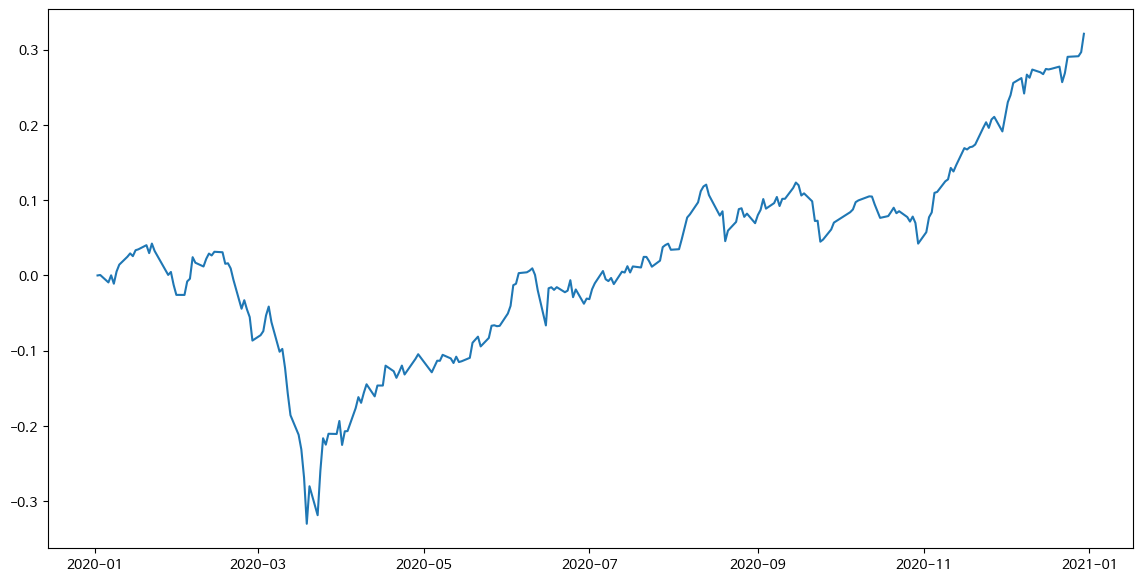

In [22]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2020년 1월 2일부터 2020년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df_kospi = stock.get_index_ohlcv_by_date("20200102", "20201231", "1001")  # "1001"은 KOSPI 지수 코드

# 2020년 1월 2일의 종가 가져오기
initial_close_kospi = df_kospi.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df_kospi['증가율'] = (df_kospi['종가'] / initial_close_kospi) - 1

# 데이터 확인
print("KOSPI Index Data:")
print(df_kospi.head(10))

# 2020년 1월 2일부터 2020년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df_2020 = stock.get_market_trading_value_by_date("20200102", "20201231", "KOSPI")

# 외국인 데이터만 선택
df_foreign_2020 = df_2020[['외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy_foreign_2020 = df_foreign_2020.cumsum()

# 2020년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_value_foreign_2020 = cumulative_net_buy_foreign_2020.iloc[0]
growth_rate_foreign_2020 = cumulative_net_buy_foreign_2020 / initial_value_foreign_2020 - 1

# 데이터 확인
print("\nForeign Investor Net Buy Data:")
print(growth_rate_foreign_2020.head(10))

# 데이터 시각화
plt.figure(figsize=(14, 7))

# KOSPI 지수 증가율 그래프
plt.plot(df_kospi.index, df_kospi['증가율'], label='KOSPI Index Growth Rate')

# 외국인 누적 순매수량 증가율 그래프
plt.plot(growth_rate_foreign_2020.index, growth_rate_foreign_2020['외국인'], label='Foreign Investor Net Buying Growth Rate')

# 그래프 타이틀 및 레이블 설정
plt.title('KOSPI Index and Foreign Investor Net Buying Growth Rate in 2020 (Base: Jan 2, 2020)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


KOSPI Index Data:
코스피              시가       고가       저가       종가        거래량           거래대금  \
날짜                                                                         
2020-01-02  2201.21  2202.32  2171.84  2175.17  494677752  4638167309579   
2020-01-03  2192.58  2203.38  2165.39  2176.46  631562785  5763662746548   
2020-01-06  2154.97  2164.42  2149.95  2155.07  592670719  5156540935534   
2020-01-07  2166.60  2181.62  2164.27  2175.54  568235609  5143511908278   
2020-01-08  2156.27  2162.32  2137.72  2151.31  913830628  8750722208310   
2020-01-09  2182.20  2186.45  2172.16  2186.45  592603655  7261591245997   
2020-01-10  2189.48  2206.92  2188.10  2206.39  594536948  6459299778577   
2020-01-13  2204.49  2230.43  2204.49  2229.26  488288759  6214780461727   
2020-01-14  2243.06  2250.79  2232.94  2238.88  835899254  7294227861325   
2020-01-15  2229.80  2238.21  2223.39  2230.98  746156323  5946351320652   

코스피                   상장시가총액       증가율  
날짜                          

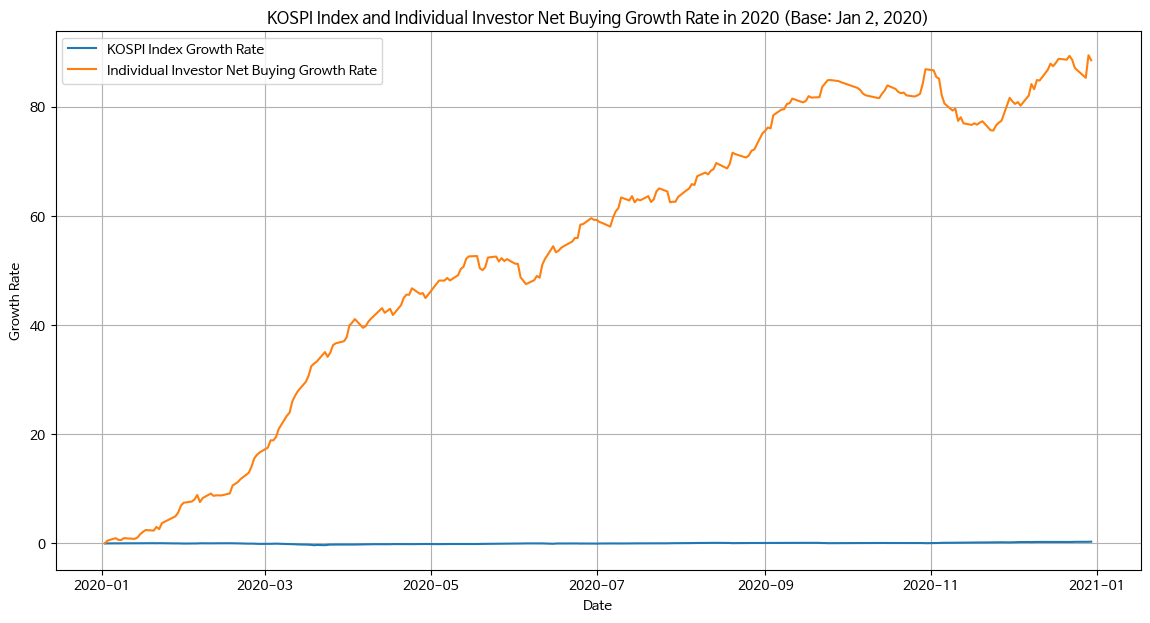

In [23]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2020년 1월 2일부터 2020년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df_kospi = stock.get_index_ohlcv_by_date("20200102", "20201231", "1001")  # "1001"은 KOSPI 지수 코드

# 2020년 1월 2일의 종가 가져오기
initial_close_kospi = df_kospi.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df_kospi['증가율'] = (df_kospi['종가'] / initial_close_kospi) - 1

# 데이터 확인
print("KOSPI Index Data:")
print(df_kospi.head(10))

# 2020년 1월 2일부터 2020년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df_2020 = stock.get_market_trading_value_by_date("20200102", "20201231", "KOSPI")

# 개인 데이터만 선택
df_individual_2020 = df_2020[['개인']]

# 누적 순매수량 계산
cumulative_net_buy_individual_2020 = df_individual_2020.cumsum()

# 2020년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_value_individual_2020 = cumulative_net_buy_individual_2020.iloc[0]
growth_rate_individual_2020 = cumulative_net_buy_individual_2020 / initial_value_individual_2020 - 1

# 데이터 확인
print("\nIndividual Investor Net Buy Data:")
print(growth_rate_individual_2020.head(10))

# 데이터 시각화
plt.figure(figsize=(14, 7))

# KOSPI 지수 증가율 그래프
plt.plot(df_kospi.index, df_kospi['증가율'], label='KOSPI Index Growth Rate')

# 개인 누적 순매수량 증가율 그래프
plt.plot(growth_rate_individual_2020.index, growth_rate_individual_2020['개인'], label='Individual Investor Net Buying Growth Rate')

# 그래프 타이틀 및 레이블 설정
plt.title('KOSPI Index and Individual Investor Net Buying Growth Rate in 2020 (Base: Jan 2, 2020)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


KOSPI Index Data for 2024:
코스피              시가       고가       저가       종가        거래량            거래대금  \
날짜                                                                          
2024-01-02  2645.47  2675.80  2641.88  2669.81  409871688   9628190129018   
2024-01-03  2643.54  2643.72  2607.31  2607.31  463131608  10121578328315   
2024-01-04  2592.44  2602.64  2580.09  2587.02  770176172   8992273956601   
2024-01-05  2586.89  2592.29  2572.60  2578.08  522289892   8384472928787   
2024-01-08  2584.23  2591.68  2566.34  2567.82  320143990   6763632029996   
2024-01-09  2598.31  2599.37  2556.00  2561.24  791214273   8896714487368   
2024-01-10  2563.97  2568.19  2539.82  2541.98  570021066   8795834820834   
2024-01-11  2543.03  2557.30  2540.27  2540.27  788422596  13669889824902   
2024-01-12  2536.55  2543.83  2517.76  2525.05  790177187   8368765827550   
2024-01-15  2525.69  2536.06  2515.84  2525.99  802102006   8182706743844   

코스피                   상장시가총액       증가율  
날짜     

KeyError: '외국인'

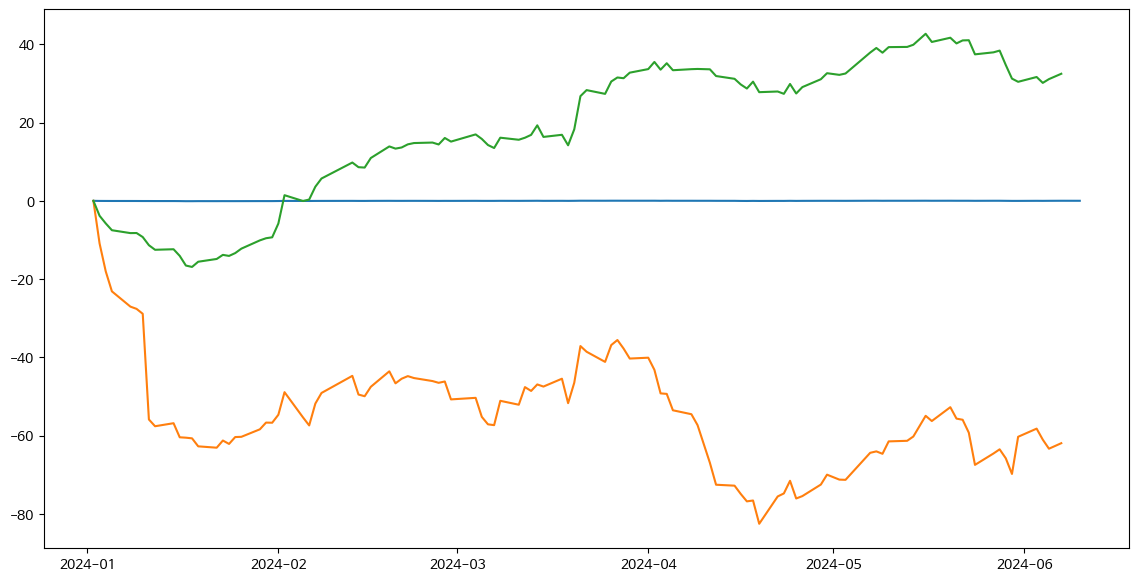

In [24]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df_kospi_2024 = stock.get_index_ohlcv_by_date("20240102", "20241231", "1001")  # "1001"은 KOSPI 지수 코드

# 2024년 1월 2일의 종가 가져오기
initial_close_kospi_2024 = df_kospi_2024.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df_kospi_2024['증가율'] = (df_kospi_2024['종가'] / initial_close_kospi_2024) - 1

# 데이터 확인
print("KOSPI Index Data for 2024:")
print(df_kospi_2024.head(10))

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df_2024 = stock.get_market_trading_value_by_date("20240102", "20240607", "KOSPI")

# 기관, 개인, 외국인 데이터만 선택
df_2024 = df_2024[['기관합계', '개인', '외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy_2024 = df_2024.cumsum()

# 2024년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values_2024 = cumulative_net_buy_2024.iloc[0]
growth_rates_2024 = cumulative_net_buy_2024 / initial_values_2024 - 1

# 데이터 확인
print("\nGrowth Rates Data for 2024:")
print(growth_rates_2024.head(10))

# 데이터 시각화
plt.figure(figsize=(14, 7))

# KOSPI 지수 증가율 그래프
plt.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI Index Growth Rate')

# 기관, 개인, 외국인 누적 순매수량 증가율 그래프
plt.plot(growth_rates_2024.index, growth_rates_2024['기관합계'], label='Institutional Investor Net Buying Growth Rate')
plt.plot(growth_rates_2024.index, growth_rates_2024['개인'], label='Individual Investor Net Buying Growth Rate')
plt.plot(growth_rates_2024.index, growth_rates_2024['외국인'], label='Foreign Investor Net Buying Growth Rate')

# 그래프 타이틀 및 레이블 설정
plt.title('KOSPI Index and Investor Net Buying Growth Rate in 2024 (Base: Jan 2, 2024)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df_kospi_2024 = stock.get_index_ohlcv_by_date("20240102", "20241231", "1001")  # "1001"은 KOSPI 지수 코드

# 2024년 1월 2일의 종가 가져오기
initial_close_kospi_2024 = df_kospi_2024.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df_kospi_2024['증가율'] = (df_kospi_2024['종가'] / initial_close_kospi_2024) - 1

# 데이터 확인
print("KOSPI Index Data for 2024:")
print(df_kospi_2024.head(10))


KOSPI Index Data for 2024:
코스피              시가       고가       저가       종가        거래량            거래대금  \
날짜                                                                          
2024-01-02  2645.47  2675.80  2641.88  2669.81  409871688   9628190129018   
2024-01-03  2643.54  2643.72  2607.31  2607.31  463131608  10121578328315   
2024-01-04  2592.44  2602.64  2580.09  2587.02  770176172   8992273956601   
2024-01-05  2586.89  2592.29  2572.60  2578.08  522289892   8384472928787   
2024-01-08  2584.23  2591.68  2566.34  2567.82  320143990   6763632029996   
2024-01-09  2598.31  2599.37  2556.00  2561.24  791214273   8896714487368   
2024-01-10  2563.97  2568.19  2539.82  2541.98  570021066   8795834820834   
2024-01-11  2543.03  2557.30  2540.27  2540.27  788422596  13669889824902   
2024-01-12  2536.55  2543.83  2517.76  2525.05  790177187   8368765827550   
2024-01-15  2525.69  2536.06  2515.84  2525.99  802102006   8182706743844   

코스피                   상장시가총액       증가율  
날짜     

In [26]:
# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df_2024 = stock.get_market_trading_value_by_date("20240102", "20241231", "KOSPI")

# 기관, 개인, 외국인 데이터만 선택
df_2024 = df_2024[['기관합계', '개인', '외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy_2024 = df_2024.cumsum()

# 2024년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values_2024 = cumulative_net_buy_2024.iloc[0]
growth_rates_2024 = cumulative_net_buy_2024 / initial_values_2024 - 1

# 데이터 확인
print("\nGrowth Rates Data for 2024:")
print(growth_rates_2024.head(10))



Growth Rates Data for 2024:
                 기관합계         개인      외국인합계
날짜                                         
2024-01-02   0.000000   0.000000   0.000000
2024-01-03 -10.898909  -3.822548  -0.412393
2024-01-04 -18.031773  -5.770771   0.094808
2024-01-05 -23.138753  -7.512141  -0.098347
2024-01-08 -27.038985  -8.247892   0.665776
2024-01-09 -27.614552  -8.225963   0.966193
2024-01-10 -28.874293  -9.254594   0.869665
2024-01-11 -55.885946 -11.342916  10.998096
2024-01-12 -57.614387 -12.511156  10.053911
2024-01-15 -56.840278 -12.373262   9.840942


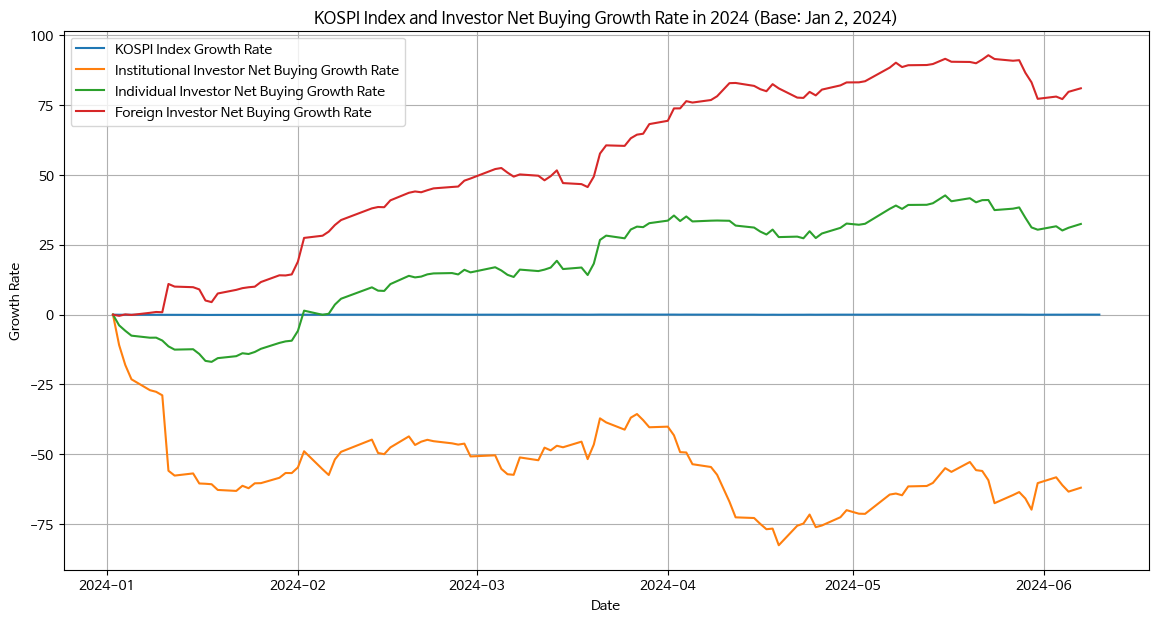

In [28]:
# 데이터 시각화
plt.figure(figsize=(14, 7))

# KOSPI 지수 증가율 그래프
plt.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI Index Growth Rate')

# 기관, 개인, 외국인 누적 순매수량 증가율 그래프
plt.plot(growth_rates_2024.index, growth_rates_2024['기관합계'], label='Institutional Investor Net Buying Growth Rate')
plt.plot(growth_rates_2024.index, growth_rates_2024['개인'], label='Individual Investor Net Buying Growth Rate')
plt.plot(growth_rates_2024.index, growth_rates_2024['외국인합계'], label='Foreign Investor Net Buying Growth Rate')

# 그래프 타이틀 및 레이블 설정
plt.title('KOSPI Index and Investor Net Buying Growth Rate in 2024 (Base: Jan 2, 2024)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


KOSPI Index Data for 2024:
코스피              시가       고가       저가       종가        거래량            거래대금  \
날짜                                                                          
2024-01-02  2645.47  2675.80  2641.88  2669.81  409871688   9628190129018   
2024-01-03  2643.54  2643.72  2607.31  2607.31  463131608  10121578328315   
2024-01-04  2592.44  2602.64  2580.09  2587.02  770176172   8992273956601   
2024-01-05  2586.89  2592.29  2572.60  2578.08  522289892   8384472928787   
2024-01-08  2584.23  2591.68  2566.34  2567.82  320143990   6763632029996   
2024-01-09  2598.31  2599.37  2556.00  2561.24  791214273   8896714487368   
2024-01-10  2563.97  2568.19  2539.82  2541.98  570021066   8795834820834   
2024-01-11  2543.03  2557.30  2540.27  2540.27  788422596  13669889824902   
2024-01-12  2536.55  2543.83  2517.76  2525.05  790177187   8368765827550   
2024-01-15  2525.69  2536.06  2515.84  2525.99  802102006   8182706743844   

코스피                   상장시가총액       증가율  
날짜     

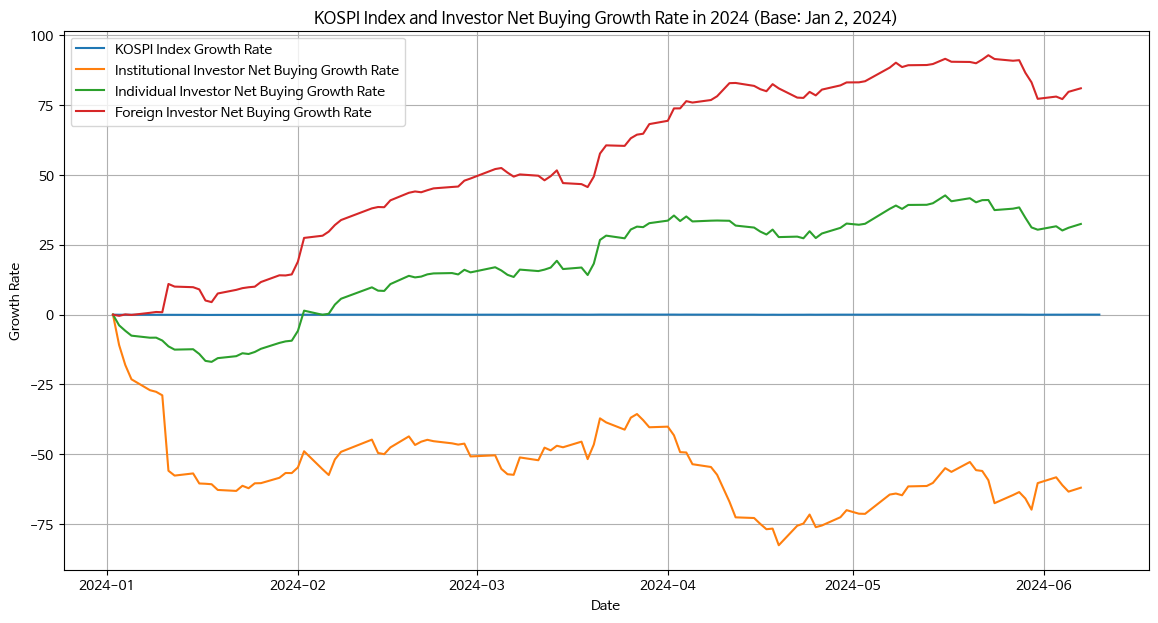

In [29]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df_kospi_2024 = stock.get_index_ohlcv_by_date("20240102", "20241231", "1001")  # "1001"은 KOSPI 지수 코드

# 2024년 1월 2일의 종가 가져오기
initial_close_kospi_2024 = df_kospi_2024.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df_kospi_2024['증가율'] = (df_kospi_2024['종가'] / initial_close_kospi_2024) - 1

# 데이터 확인
print("KOSPI Index Data for 2024:")
print(df_kospi_2024.head(10))

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df_2024 = stock.get_market_trading_value_by_date("20240102", "20241231", "KOSPI")

# 기관, 개인, 외국인 데이터만 선택
df_2024 = df_2024[['기관합계', '개인', '외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy_2024 = df_2024.cumsum()

# 2024년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values_2024 = cumulative_net_buy_2024.iloc[0]
growth_rates_2024 = cumulative_net_buy_2024 / initial_values_2024 - 1

# 데이터 확인
print("\nGrowth Rates Data for 2024:")
print(growth_rates_2024.head(10))

# 데이터 시각화
plt.figure(figsize=(14, 7))

# KOSPI 지수 증가율 그래프
plt.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI Index Growth Rate')

# 기관, 개인, 외국인 누적 순매수량 증가율 그래프
plt.plot(growth_rates_2024.index, growth_rates_2024['기관합계'], label='Institutional Investor Net Buying Growth Rate')
plt.plot(growth_rates_2024.index, growth_rates_2024['개인'], label='Individual Investor Net Buying Growth Rate')
plt.plot(growth_rates_2024.index, growth_rates_2024['외국인합계'], label='Foreign Investor Net Buying Growth Rate')

# 그래프 타이틀 및 레이블 설정
plt.title('KOSPI Index and Investor Net Buying Growth Rate in 2024 (Base: Jan 2, 2024)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


코스피              시가       고가       저가       종가        거래량            거래대금  \
날짜                                                                          
2024-01-02  2645.47  2675.80  2641.88  2669.81  409871688   9628190129018   
2024-01-03  2643.54  2643.72  2607.31  2607.31  463131608  10121578328315   
2024-01-04  2592.44  2602.64  2580.09  2587.02  770176172   8992273956601   
2024-01-05  2586.89  2592.29  2572.60  2578.08  522289892   8384472928787   
2024-01-08  2584.23  2591.68  2566.34  2567.82  320143990   6763632029996   
2024-01-09  2598.31  2599.37  2556.00  2561.24  791214273   8896714487368   
2024-01-10  2563.97  2568.19  2539.82  2541.98  570021066   8795834820834   
2024-01-11  2543.03  2557.30  2540.27  2540.27  788422596  13669889824902   
2024-01-12  2536.55  2543.83  2517.76  2525.05  790177187   8368765827550   
2024-01-15  2525.69  2536.06  2515.84  2525.99  802102006   8182706743844   

코스피                   상장시가총액       증가율  
날짜                                

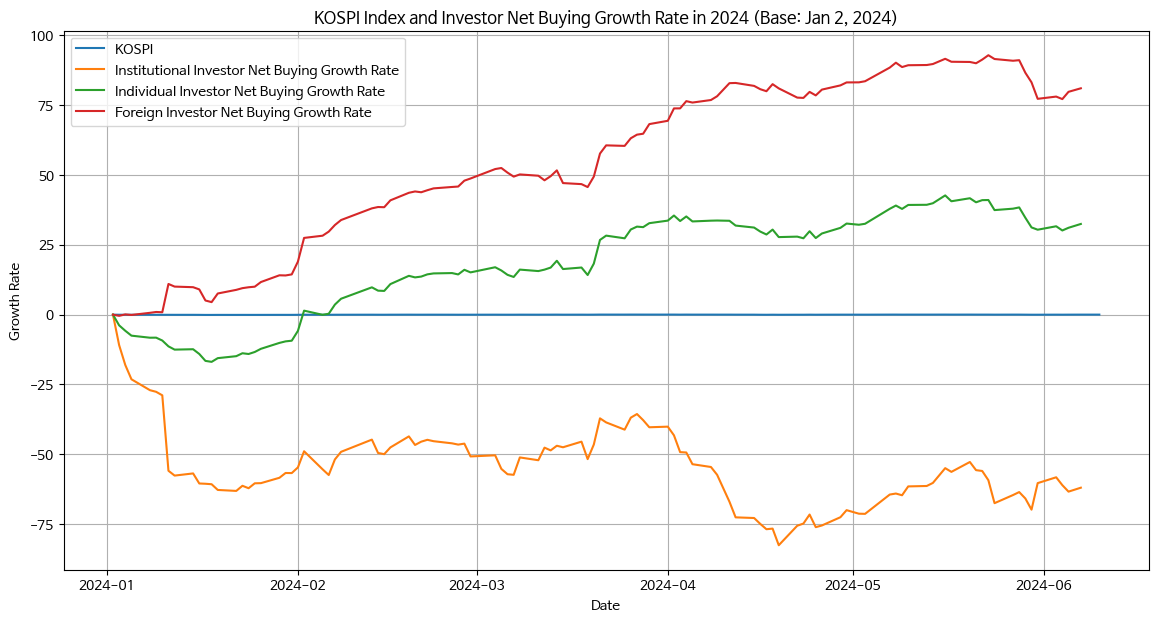

In [37]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df_kospi_2024 = stock.get_index_ohlcv_by_date("20240102", "20241231", "1001")  # "1001"은 KOSPI 지수 코드

# 2024년 1월 2일의 종가 가져오기
initial_close_kospi_2024 = df_kospi_2024.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df_kospi_2024['증가율'] = (df_kospi_2024['종가'] / initial_close_kospi_2024) - 1

# 데이터 확인
#print("KOSPI Index Data for 2024:")
print(df_kospi_2024.head(10))

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df_2024 = stock.get_market_trading_value_by_date("20240102", "20241231", "KOSPI")

# 기관, 개인, 외국인 데이터만 선택
df_2024 = df_2024[['기관합계', '개인', '외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy_2024 = df_2024.cumsum()

# 데이터 확인
print("\nCumulative Net Buy Data for 2024:")
print(cumulative_net_buy_2024.head(10))

# 2024년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values_2024 = cumulative_net_buy_2024.iloc[0]
growth_rates_2024 = cumulative_net_buy_2024 / initial_values_2024 - 1

# 데이터 확인
#print("\nGrowth Rates Data for 2024:")
print(growth_rates_2024.head(10))

# 데이터 시각화
plt.figure(figsize=(14, 7))

# KOSPI 지수 증가율 그래프
plt.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI ')

# 기관, 개인, 외국인 누적 순매수량 증가율 그래프
plt.plot(growth_rates_2024.index, growth_rates_2024['기관합계'], label='Institutional Investor Net Buying Growth Rate')
plt.plot(growth_rates_2024.index, growth_rates_2024['개인'], label='Individual Investor Net Buying Growth Rate')
plt.plot(growth_rates_2024.index, growth_rates_2024['외국인합계'], label='Foreign Investor Net Buying Growth Rate')

# 그래프 타이틀 및 레이블 설정
plt.title('KOSPI Index and Investor Net Buying Growth Rate in 2024 (Base: Jan 2, 2024)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


KOSPI Index Growth Rate Data for 2024:
코스피              시가       고가       저가       종가        거래량            거래대금  \
날짜                                                                          
2024-01-02  2645.47  2675.80  2641.88  2669.81  409871688   9628190129018   
2024-01-03  2643.54  2643.72  2607.31  2607.31  463131608  10121578328315   
2024-01-04  2592.44  2602.64  2580.09  2587.02  770176172   8992273956601   
2024-01-05  2586.89  2592.29  2572.60  2578.08  522289892   8384472928787   
2024-01-08  2584.23  2591.68  2566.34  2567.82  320143990   6763632029996   
2024-01-09  2598.31  2599.37  2556.00  2561.24  791214273   8896714487368   
2024-01-10  2563.97  2568.19  2539.82  2541.98  570021066   8795834820834   
2024-01-11  2543.03  2557.30  2540.27  2540.27  788422596  13669889824902   
2024-01-12  2536.55  2543.83  2517.76  2525.05  790177187   8368765827550   
2024-01-15  2525.69  2536.06  2515.84  2525.99  802102006   8182706743844   

코스피                   상장시가총액       증

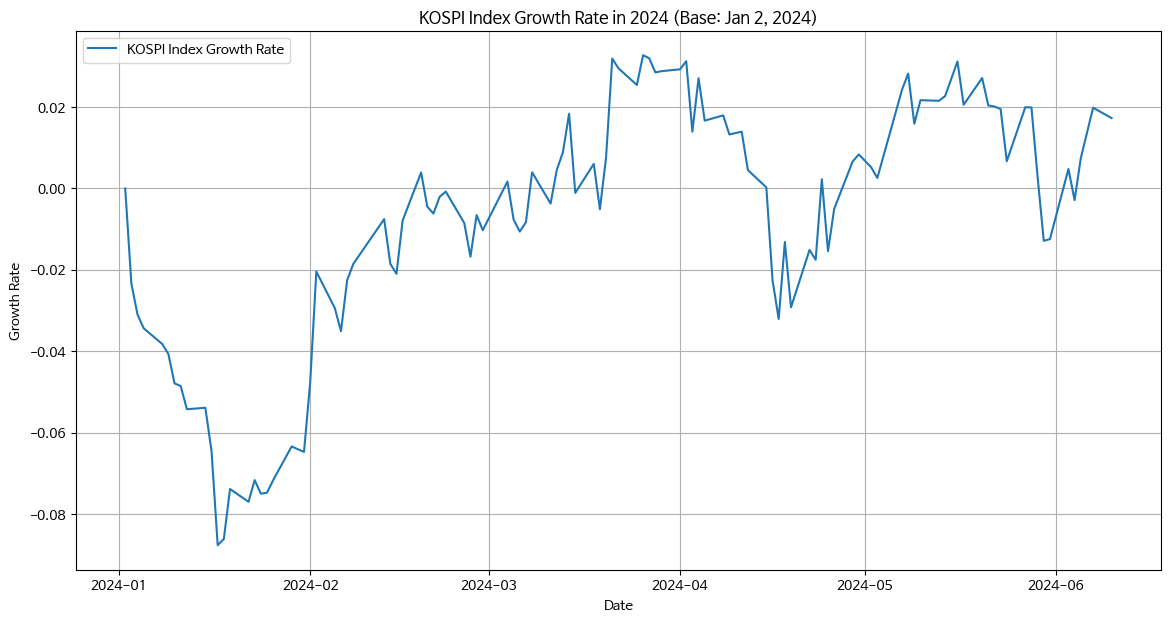

In [38]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df_kospi_2024 = stock.get_index_ohlcv_by_date("20240102", "20241231", "1001")  # "1001"은 KOSPI 지수 코드

# 2024년 1월 2일의 종가 가져오기
initial_close_kospi_2024 = df_kospi_2024.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df_kospi_2024['증가율'] = (df_kospi_2024['종가'] / initial_close_kospi_2024) - 1

# 데이터 확인
print("KOSPI Index Growth Rate Data for 2024:")
print(df_kospi_2024.head(10))

# 코스피 지수 증가율 그래프
plt.figure(figsize=(14, 7))
plt.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI Index Growth Rate')

# 그래프 타이틀 및 레이블 설정
plt.title('KOSPI Index Growth Rate in 2024 (Base: Jan 2, 2024)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


KOSPI Index Data for 2024:
코스피              시가       고가       저가       종가        거래량            거래대금  \
날짜                                                                          
2024-01-02  2645.47  2675.80  2641.88  2669.81  409871688   9628190129018   
2024-01-03  2643.54  2643.72  2607.31  2607.31  463131608  10121578328315   
2024-01-04  2592.44  2602.64  2580.09  2587.02  770176172   8992273956601   
2024-01-05  2586.89  2592.29  2572.60  2578.08  522289892   8384472928787   
2024-01-08  2584.23  2591.68  2566.34  2567.82  320143990   6763632029996   
2024-01-09  2598.31  2599.37  2556.00  2561.24  791214273   8896714487368   
2024-01-10  2563.97  2568.19  2539.82  2541.98  570021066   8795834820834   
2024-01-11  2543.03  2557.30  2540.27  2540.27  788422596  13669889824902   
2024-01-12  2536.55  2543.83  2517.76  2525.05  790177187   8368765827550   
2024-01-15  2525.69  2536.06  2515.84  2525.99  802102006   8182706743844   

코스피                   상장시가총액       증가율  
날짜     

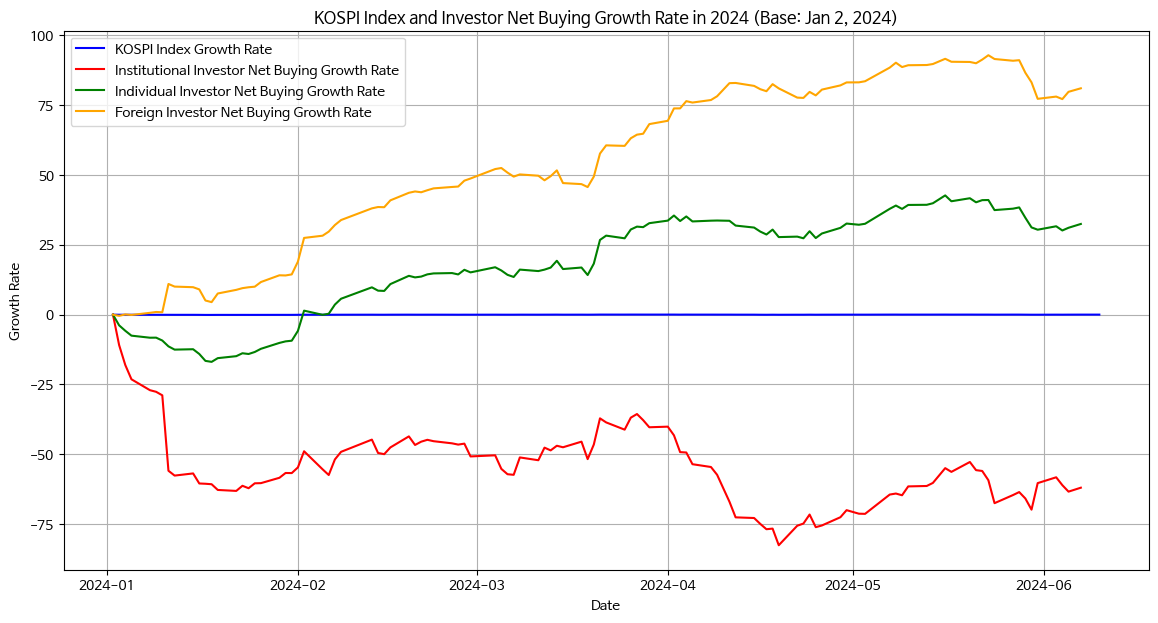

In [39]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df_kospi_2024 = stock.get_index_ohlcv_by_date("20240102", "20241231", "1001")  # "1001"은 KOSPI 지수 코드

# 2024년 1월 2일의 종가 가져오기
initial_close_kospi_2024 = df_kospi_2024.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df_kospi_2024['증가율'] = (df_kospi_2024['종가'] / initial_close_kospi_2024) - 1

# 데이터 확인
print("KOSPI Index Data for 2024:")
print(df_kospi_2024.head(10))

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df_2024 = stock.get_market_trading_value_by_date("20240102", "20241231", "KOSPI")

# 기관, 개인, 외국인 데이터만 선택
df_2024 = df_2024[['기관합계', '개인', '외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy_2024 = df_2024.cumsum()

# 데이터 확인
print("\nCumulative Net Buy Data for 2024:")
print(cumulative_net_buy_2024.head(10))

# 2024년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values_2024 = cumulative_net_buy_2024.iloc[0]
growth_rates_2024 = cumulative_net_buy_2024 / initial_values_2024 - 1

# 데이터 확인
print("\nGrowth Rates Data for 2024:")
print(growth_rates_2024.head(10))

# 데이터 시각화
plt.figure(figsize=(14, 7))

# KOSPI 지수 증가율 그래프
plt.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI Index Growth Rate', color='blue')

# 기관, 개인, 외국인 누적 순매수량 증가율 그래프
plt.plot(growth_rates_2024.index, growth_rates_2024['기관합계'], label='Institutional Investor Net Buying Growth Rate', color='red')
plt.plot(growth_rates_2024.index, growth_rates_2024['개인'], label='Individual Investor Net Buying Growth Rate', color='green')
plt.plot(growth_rates_2024.index, growth_rates_2024['외국인합계'], label='Foreign Investor Net Buying Growth Rate', color='orange')

# 그래프 타이틀 및 레이블 설정
plt.title('KOSPI Index and Investor Net Buying Growth Rate in 2024 (Base: Jan 2, 2024)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
print("KOSPI Index Data for 2024:")
print(df_kospi_2024[['종가', '증가율']].head(10))


KOSPI Index Data for 2024:
코스피              종가       증가율
날짜                           
2024-01-02  2669.81  0.000000
2024-01-03  2607.31 -0.023410
2024-01-04  2587.02 -0.031010
2024-01-05  2578.08 -0.034358
2024-01-08  2567.82 -0.038201
2024-01-09  2561.24 -0.040666
2024-01-10  2541.98 -0.047880
2024-01-11  2540.27 -0.048520
2024-01-12  2525.05 -0.054221
2024-01-15  2525.99 -0.053869


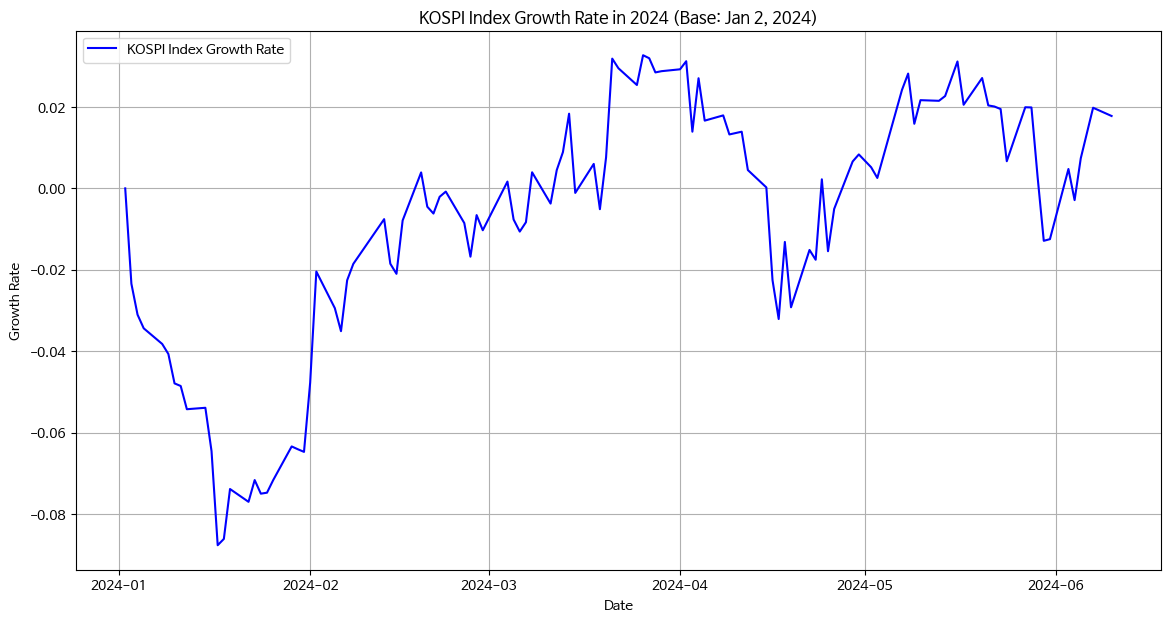

In [41]:
# 코스피 지수 증가율 그래프만 별도로 그리기
plt.figure(figsize=(14, 7))
plt.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI Index Growth Rate', color='blue')
plt.title('KOSPI Index Growth Rate in 2024 (Base: Jan 2, 2024)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
# 인덱스를 날짜 형식으로 변환
df_kospi_2024.index = pd.to_datetime(df_kospi_2024.index)

# 변환된 인덱스 확인
print(df_kospi_2024.index)


DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-15',
               ...
               '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30',
               '2024-05-31', '2024-06-03', '2024-06-04', '2024-06-05',
               '2024-06-07', '2024-06-10'],
              dtype='datetime64[ns]', name='날짜', length=107, freq=None)


In [43]:
# 증가율 컬럼의 데이터 타입 확인
print(df_kospi_2024['증가율'].dtype)

# 숫자 형식으로 변환
df_kospi_2024['증가율'] = pd.to_numeric(df_kospi_2024['증가율'])


float64


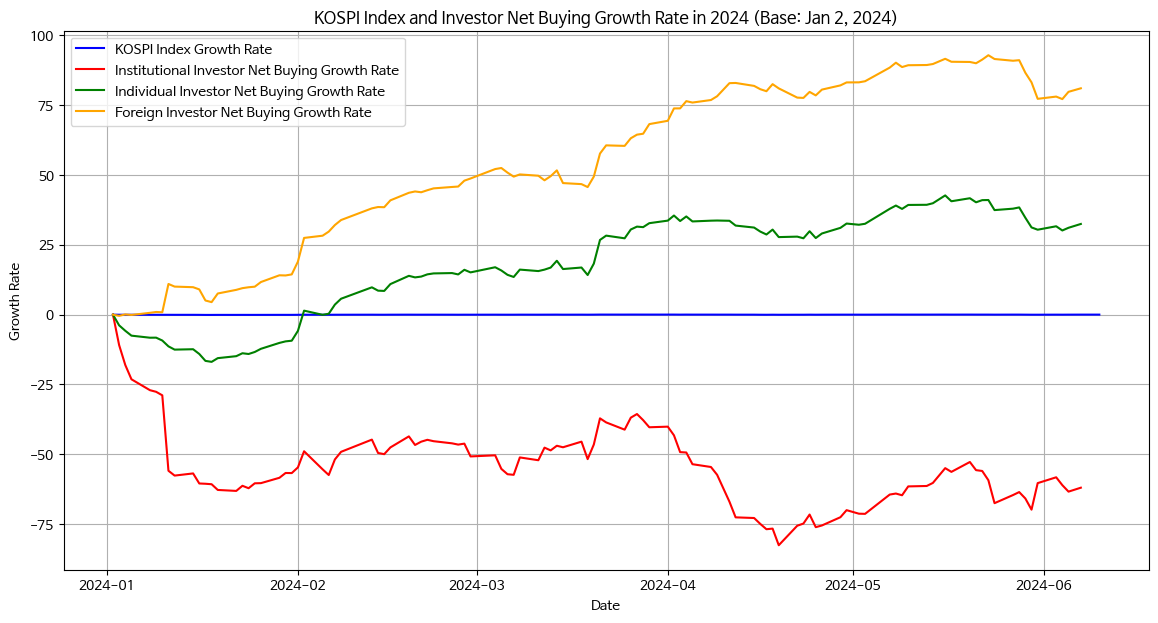

In [45]:
# 데이터 시각화
plt.figure(figsize=(14, 7))

# KOSPI 지수 증가율 그래프
plt.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI Index Growth Rate', color='blue')

# 기관, 개인, 외국인 누적 순매수량 증가율 그래프
plt.plot(growth_rates_2024.index, growth_rates_2024['기관합계'], label='Institutional Investor Net Buying Growth Rate', color='red')
plt.plot(growth_rates_2024.index, growth_rates_2024['개인'], label='Individual Investor Net Buying Growth Rate', color='green')
plt.plot(growth_rates_2024.index, growth_rates_2024['외국인합계'], label='Foreign Investor Net Buying Growth Rate', color='orange')

# 그래프 타이틀 및 레이블 설정
plt.title('KOSPI Index and Investor Net Buying Growth Rate in 2024 (Base: Jan 2, 2024)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()



Cumulative Net Buy Data for 2024:
                     기관합계             개인          외국인합계
날짜                                                     
2024-01-02   112165205550  -343870377518   226915636760
2024-01-03 -1110313218714   970590659000   133337233191
2024-01-04 -1910372373313  1640526711754   248428941816
2024-01-05 -2483197800960  2239332262358   204599248746
2024-01-08 -2920668063898  2492335525471   377990546144
2024-01-09 -2985226750199  2484794563345   446159932894
2024-01-10 -3126525853442  2838510421658   424256260537
2024-01-11 -6156293384918  3556622335198  2722555481953
2024-01-12 -6350164299713  3958345716154  2508305179707
2024-01-15 -6263336241848  3910927854626  2459979200111

Growth Rates Data for 2024:
                 기관합계         개인      외국인합계
날짜                                         
2024-01-02   0.000000   0.000000   0.000000
2024-01-03 -10.898909  -3.822548  -0.412393
2024-01-04 -18.031773  -5.770771   0.094808
2024-01-05 -23.138753  -7.512141  -0.098347


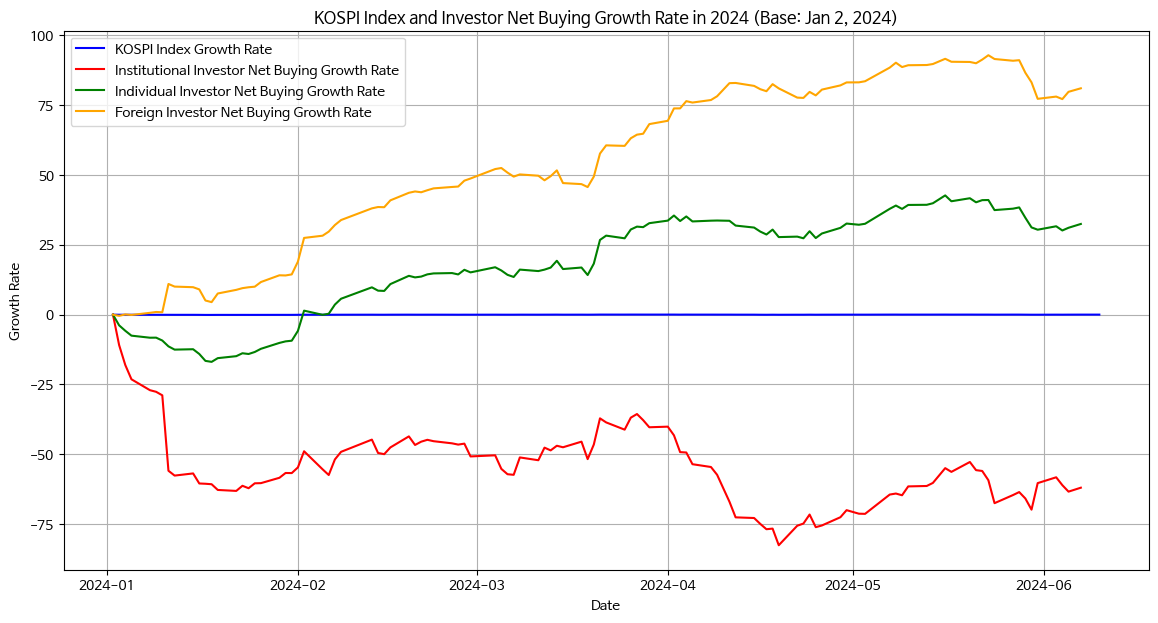

In [46]:
# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df_2024 = stock.get_market_trading_value_by_date("20240102", "20241231", "KOSPI")

# 기관, 개인, 외국인 데이터만 선택
df_2024 = df_2024[['기관합계', '개인', '외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy_2024 = df_2024.cumsum()

# 데이터 확인
print("\nCumulative Net Buy Data for 2024:")
print(cumulative_net_buy_2024.head(10))

# 2024년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values_2024 = cumulative_net_buy_2024.iloc[0]
growth_rates_2024 = cumulative_net_buy_2024 / initial_values_2024 - 1

# 데이터 확인
print("\nGrowth Rates Data for 2024:")
print(growth_rates_2024.head(10))

# 데이터 시각화
plt.figure(figsize=(14, 7))

# KOSPI 지수 증가율 그래프
plt.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI Index Growth Rate', color='blue')

# 기관, 개인, 외국인 누적 순매수량 증가율 그래프
plt.plot(growth_rates_2024.index, growth_rates_2024['기관합계'], label='Institutional Investor Net Buying Growth Rate', color='red')
plt.plot(growth_rates_2024.index, growth_rates_2024['개인'], label='Individual Investor Net Buying Growth Rate', color='green')
plt.plot(growth_rates_2024.index, growth_rates_2024['외국인합계'], label='Foreign Investor Net Buying Growth Rate', color='orange')

# 그래프 타이틀 및 레이블 설정
plt.title('KOSPI Index and Investor Net Buying Growth Rate in 2024 (Base: Jan 2, 2024)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()


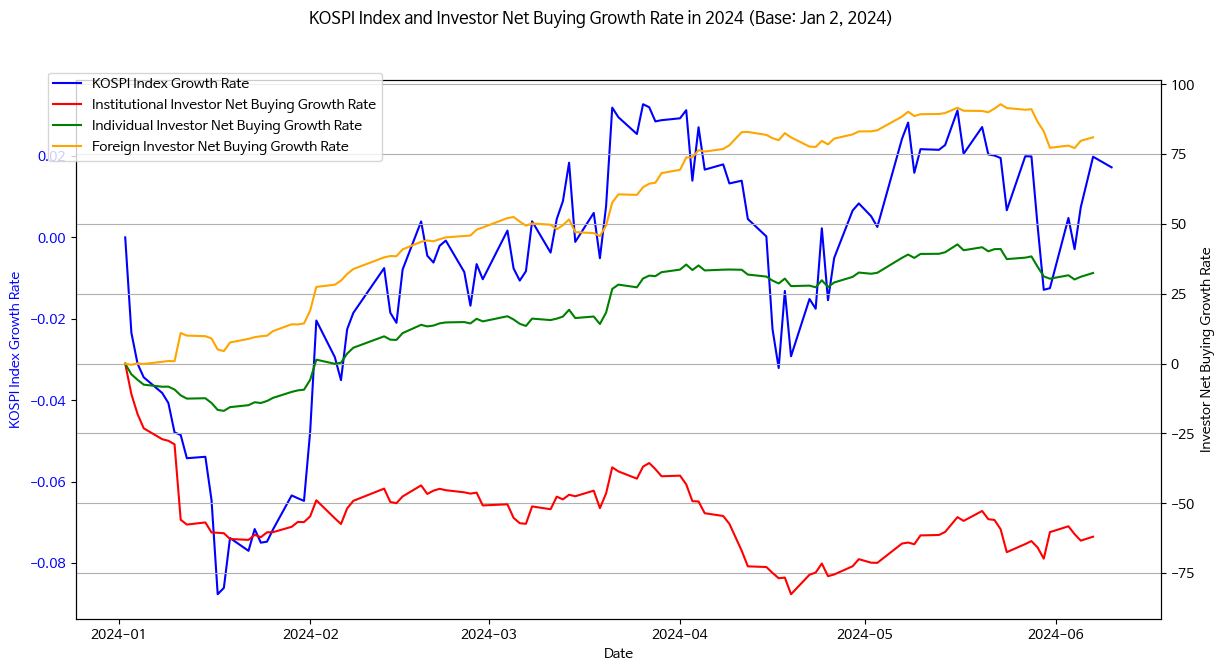

In [48]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df_kospi_2024 = stock.get_index_ohlcv_by_date("20240102", "20241231", "1001")

# 2024년 1월 2일의 종가 가져오기
initial_close_kospi_2024 = df_kospi_2024.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df_kospi_2024['증가율'] = (df_kospi_2024['종가'] / initial_close_kospi_2024) - 1

# 인덱스를 날짜 형식으로 변환
df_kospi_2024.index = pd.to_datetime(df_kospi_2024.index)

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df_2024 = stock.get_market_trading_value_by_date("20240102", "20241231", "KOSPI")

# 기관, 개인, 외국인 데이터만 선택
df_2024 = df_2024[['기관합계', '개인', '외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy_2024 = df_2024.cumsum()

# 2024년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values_2024 = cumulative_net_buy_2024.iloc[0]
growth_rates_2024 = cumulative_net_buy_2024 / initial_values_2024 - 1

# 데이터 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))

# 첫 번째 y축 (코스피 지수 증가율)
ax1.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI Index Growth Rate', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('KOSPI Index Growth Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (투자자별 순매수량 증가율)
ax2 = ax1.twinx()
ax2.plot(growth_rates_2024.index, growth_rates_2024['기관합계'], label='Institutional Investor Net Buying Growth Rate', color='red')
ax2.plot(growth_rates_2024.index, growth_rates_2024['개인'], label='Individual Investor Net Buying Growth Rate', color='green')
ax2.plot(growth_rates_2024.index, growth_rates_2024['외국인합계'], label='Foreign Investor Net Buying Growth Rate', color='orange')
ax2.set_ylabel('Investor Net Buying Growth Rate', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# 제목 및 레전드 설정
fig.suptitle('KOSPI Index and Investor Net Buying Growth Rate in 2024 (Base: Jan 2, 2024)')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)
plt.show()


Text(0.5, 0.98, 'KOSPI Index and Investor Net Buying Growth Rate in 2024')

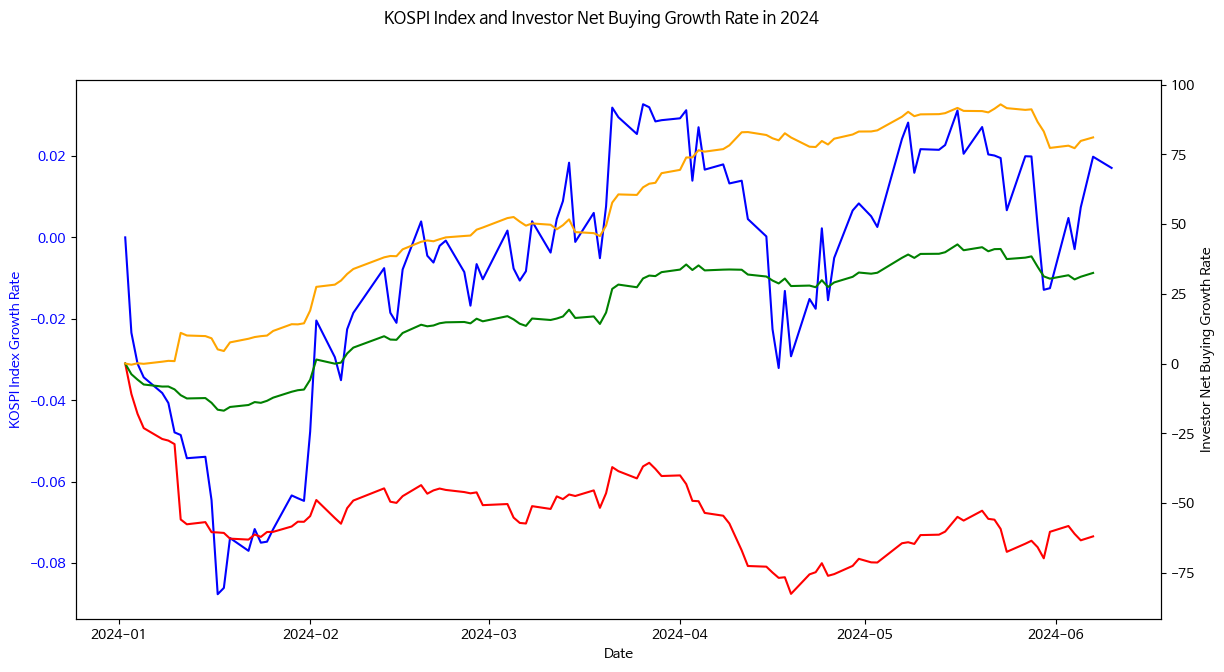

In [51]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 지수 데이터 가져오기
df_kospi_2024 = stock.get_index_ohlcv_by_date("20240102", "20241231", "1001")

# 2024년 1월 2일의 종가 가져오기
initial_close_kospi_2024 = df_kospi_2024.iloc[0]['종가']

# 종가를 기준으로 증가율 계산
df_kospi_2024['증가율'] = (df_kospi_2024['종가'] / initial_close_kospi_2024) - 1

# 인덱스를 날짜 형식으로 변환
df_kospi_2024.index = pd.to_datetime(df_kospi_2024.index)

# 2024년 1월 2일부터 2024년 12월 31일까지의 KOSPI 투자자별 순매수 데이터 가져오기
df_2024 = stock.get_market_trading_value_by_date("20240102", "20241231", "KOSPI")

# 기관, 개인, 외국인 데이터만 선택
df_2024 = df_2024[['기관합계', '개인', '외국인합계']]

# 누적 순매수량 계산
cumulative_net_buy_2024 = df_2024.cumsum()

# 2024년 1월 2일의 누적 순매수량을 기준으로 증가율 계산
initial_values_2024 = cumulative_net_buy_2024.iloc[0]
growth_rates_2024 = cumulative_net_buy_2024 / initial_values_2024 - 1

# 데이터 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))

# 첫 번째 y축 (코스피 지수 증가율)
ax1.plot(df_kospi_2024.index, df_kospi_2024['증가율'], label='KOSPI Index Growth Rate', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('KOSPI Index Growth Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (투자자별 순매수량 증가율)
ax2 = ax1.twinx()
ax2.plot(growth_rates_2024.index, growth_rates_2024['기관합계'], label='Institutional Investor Net Buying Growth Rate', color='red')
ax2.plot(growth_rates_2024.index, growth_rates_2024['개인'], label='Individual Investor Net Buying Growth Rate', color='green')
ax2.plot(growth_rates_2024.index, growth_rates_2024['외국인합계'], label='Foreign Investor Net Buying Growth Rate', color='orange')
ax2.set_ylabel('Investor Net Buying Growth Rate', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# 두 y축의 0 위치를 맞추기 위해 범위 설정
ax1_ylim = ax1.get_ylim()
ax2_ylim = ax2.get_ylim()
ax2.set_ylim((ax2_ylim[0] - initial_values_2024.min() / initial_values_2024.max() * ax1_ylim[0], ax2_ylim[1] - initial_values_2024.min() / initial_values_2024.max() * ax1_ylim[1]))
# 제목 및 레전드 설정
fig.suptitle('KOSPI Index and Investor Net Buying Growth Rate in 2024')